# 1. Load data ( rows x 26 columns)

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import missingno as msno
%matplotlib inline
pd.set_option('display.max_rows',None)
pd.options.display.float_format = '{:.0f}'.format

#pd.set_option('display.max_colwidth',500)
df=pd.read_csv('20180107.csv',encoding='gbk')
# 列出前五行
df.head()

,ID,SRC_ADD,CALLING_NUM,VDN,DIALED_NUM,DURATION,CALLING_DATE,CALLING_TIME,COND_CODE,IN_TRK_CODE,...,CALL_NUM,CALL_TYPE,CHARGE_RULE_ID,COST,CALL_DATE,CRE_DATE,MAKER_NAME,ADDRESS,MOBILE_MAKER_NAME,PROVINCE_NAME
0,1759803603,80.14.28.10,4861,76315,9885025#,60,10718,1,7,nan,...,3,2,0,0,2018/1/7 0:01:00,2018/1/16 5:28:09,IP Trunk,SIP中继(思科）,NaN,NaN
1,1759803604,80.14.28.10,18734147633,76319,4714,60,10718,1,9,4880,...,1,1,0,0,2018/1/7 0:01:00,2018/1/16 5:28:09,IP Trunk,山西-2,移动,山西
2,1759803605,80.14.28.10,4880,76319,9885030#,60,10718,1,7,nan,...,3,2,0,0,2018/1/7 0:01:00,2018/1/16 5:28:09,IP Trunk,SIP中继(思科）,NaN,NaN
3,1759803606,80.14.28.10,17809980556,76322,4710,42,10718,1,9,4823,...,1,1,0,0,2018/1/7 0:01:00,2018/1/16 5:28:09,IP Trunk,新疆,移动,山西
4,1759803607,80.14.28.10,4823,76322,9885037#,42,10718,1,7,nan,...,3,2,0,0,2018/1/7 0:01:00,2018/1/16 5:28:09,IP Trunk,SIP中继(思科）,NaN,NaN


In [2]:
# (行数, 列数)
df.shape

(1231879, 26)

# 2. Filter data(数据清洗)

- 分析通话为主叫
- 号码为手机、座机、IP电话
- 关注的呼入中继（IN_TRK_CODE）号
- 排除6个手机号码，这6个号码其它系统进行工行拨测使用号码

In [21]:
# filter dailed out & 95588 & area_code + 95588
df = df[(df['CALL_TYPE'] == 1) & \
        (df['CALLING_NUM']/1000000 >= 1) & ((df['CALLING_NUM']%100000 != 95588) | (df['CALLING_NUM']/100000000 >= 1))]

# filter test numbers
df = df[df['CALLING_NUM'].isin([18210261957, 18210261795, 17343195721, \
                               17718332497, 13263105230, 13263103918]) == False]

# filter IN_TRK_CODE
df = df[df['IN_TRK_CODE'].isin([4860,4881,4815,4816,4834,4873,4878,4899,4820,4862,\
                                4849,4850,4828,4827,4858,4859,4840,4829,4848,4830,\
                                4831,4832,4833,4847,4854,4705,4706,4707,4708,4709,\
                                4710,4711,4712,4713,4714,4855,4715,4716,4717,4718,\
                                4719,4720,4721,4722,4723,4724,4856,4725,4726,4727,\
                                4728,4729,4730,4731,4732,4733,4857,4700,4701,4702,\
                                4703,4704,4872,4804,4894,4801,4898,4821,4805,4897,\
                                4806,4802,4892,4893,4890,4861,4870,4826,4885,4886,\
                                4810,4811,4852,4853,4880,4879,4807,4823,4876,4877,\
                                4808,4803,4812])]

df.shape

(328966, 26)

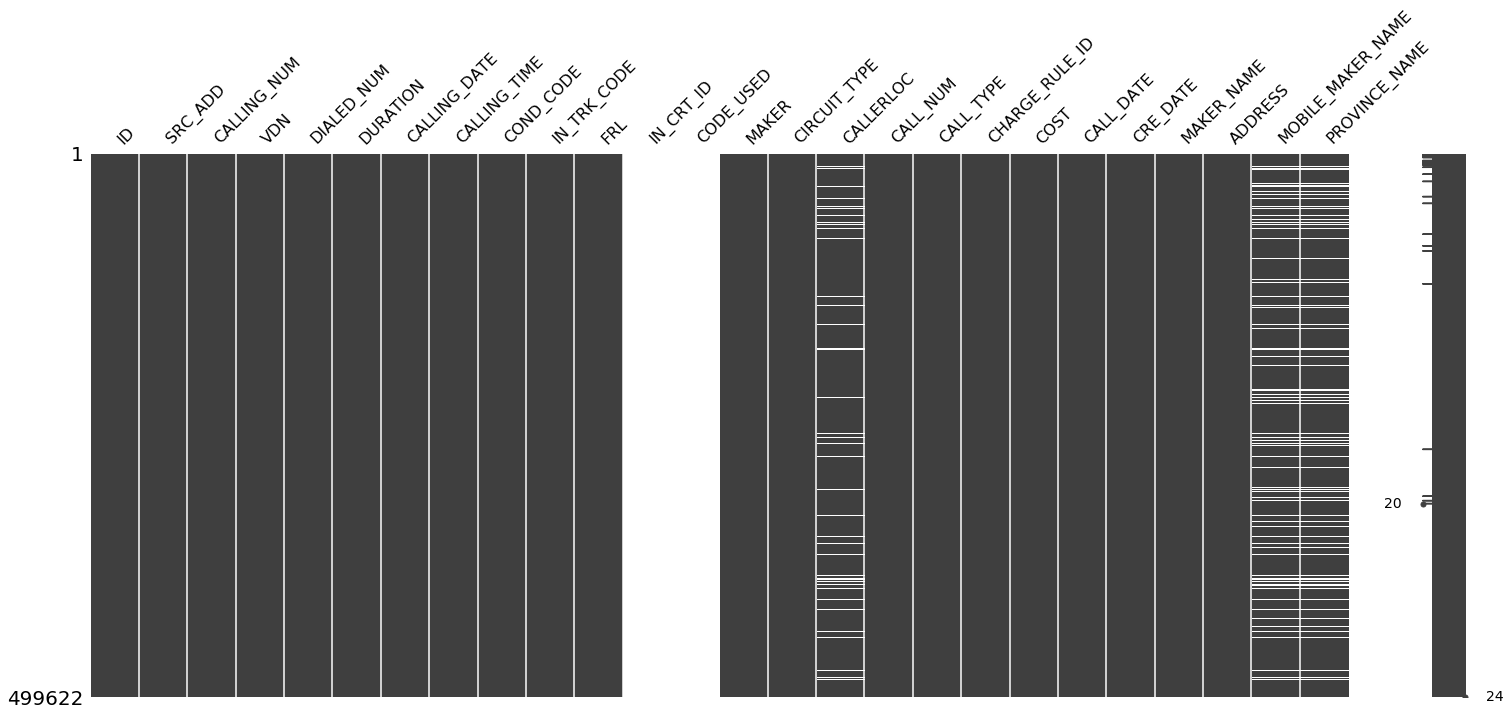

In [4]:
# missing data visualization
msno.matrix(df)

In [5]:
# Missing values
df.isnull().sum()

ID                        0
SRC_ADD                   0
CALLING_NUM               0
VDN                       0
DIALED_NUM                0
DURATION                  0
CALLING_DATE              0
CALLING_TIME              0
COND_CODE                 0
IN_TRK_CODE               0
FRL                       0
IN_CRT_ID            499622
CODE_USED            499622
MAKER                     0
CIRCUIT_TYPE              0
CALLERLOC             33486
CALL_NUM                  0
CALL_TYPE                 0
CHARGE_RULE_ID            0
COST                      0
CALL_DATE                 0
CRE_DATE                  0
MAKER_NAME               36
ADDRESS                   0
MOBILE_MAKER_NAME     59489
PROVINCE_NAME         59489
dtype: int64

## 分析每个类别top10号码，发现座机或IP电话比手机拨打频次更高 

In [22]:
df['HOURS'] = df['CALLING_TIME'].apply(lambda x:abs(x) / 100 )

#移动
df_y = df[(df['CALLING_NUM']/100000000).astype(int).isin([134,135,136,137,138,139,147,150,151,152,157,159,182,183,187,188,172,178,184,198,148])]
print "=====China mobile："
print df_y.shape
print len(df_y["CALLING_NUM"].unique())
print df_y["CALLING_NUM"].value_counts().nlargest(10)
#联通
df_l = df[(df['CALLING_NUM']/100000000).astype(int).isin([130,131,132,145,155,156,186,171,175,176,185,166,146])]
print "=====China Unicom:" 
print df_l.shape
print len(df_l["CALLING_NUM"].unique())
print df_l["CALLING_NUM"].value_counts().nlargest(10)
#电信
df_d = df[(df['CALLING_NUM']/100000000).astype(int).isin([133,153,180,189,149,173,177,181,199])]
print "=====China Telecommunications:"
print df_d.shape
print len(df_d["CALLING_NUM"].unique())
print df_d["CALLING_NUM"].value_counts().nlargest(10)
#others
print "=====Others:"
df_g = df[(df['CALLING_NUM']/100000000).astype(int).isin([134,135,136,137,138,139,147,150,151,152,157,159,182,183,187,188,172,178,184,198,148,\
                                                         130,131,132,145,155,156,186,171,175,176,185,166,146,\
                                                         133,153,180,189,149,173,177,181,199]) == False]
print df_g.shape
print len(df_g["CALLING_NUM"].unique())
print df_g["CALLING_NUM"].value_counts().nlargest(10)

=====China mobile：
(173320, 27)
116711
18841701593    79
15236646257    53
13838665536    50
13993286757    32
15064521239    30
15729037017    28
13759677909    26
18702277700    25
18845152946    23
13600918329    22
Name: CALLING_NUM, dtype: int64
=====China Unicom:
(82390, 27)
54916
15659680980    44
13198235721    42
13259939729    40
17129503063    39
18561507251    37
17696646827    37
13072610405    35
17152102263    32
17152102258    28
17163237176    27
Name: CALLING_NUM, dtype: int64
=====China Telecommunications:
(51838, 27)
35098
17750180597    90
18166113507    85
17750764450    32
13364390036    25
18161561418    20
17704770185    19
15314177199    17
18993509067    17
18999941743    17
13314711825    16
Name: CALLING_NUM, dtype: int64
=====Others:
(21418, 27)
13955
3553368009     45
3517893773     35
2472853935     34
9128153985     33
9518646912     31
15865258045    30
37962903605    24
53284688617    24
3735266118     19
4595835737     19
Name: CALLING_NUM, dtype: in

# 将头七位号段发现有规律号码粘入列出每通电话信息

In [24]:
#pd.set_option('display.max_column',None)
#df_2 = df[(df['CALLING_NUM']/10000).astype(int)==1775005]
#df_2 = df[df['CALLING_NUM']==13015521847]
df_2 = df[df['CALLING_NUM'].isin([15524774686])]
#df.loc[::,["ID","CALLING","DIALED_NUM","DURATION","IN_TRK_CODE","ADDRESS","PROVINCE_NAME","CALLERLOC"]]
df_2.loc[::,["CALLING_NUM","DIALED_NUM","DURATION","IN_TRK_CODE","ADDRESS","PROVINCE_NAME","CALLERLOC","CALL_DATE"]]
#df.columns

,CALLING_NUM,DIALED_NUM,DURATION,IN_TRK_CODE,ADDRESS,PROVINCE_NAME,CALLERLOC,CALL_DATE
208378,15524774686,4700,6,4872,大连,辽宁,大连,2018/1/7 11:03:00
209400,15524774686,4700,0,4872,大连,辽宁,大连,2018/1/7 11:02:00
210179,15524774686,4700,6,4872,大连,辽宁,大连,2018/1/7 11:03:00
211172,15524774686,4700,6,4872,大连,辽宁,大连,2018/1/7 11:03:00
212837,15524774686,4700,6,4872,大连,辽宁,大连,2018/1/7 11:04:00
220918,15524774686,4700,6,4872,大连,辽宁,大连,2018/1/7 11:03:00


12    64
6     15
Name: DURATION, dtype: int64


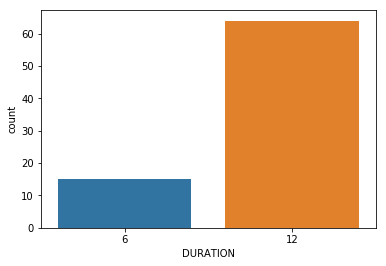

In [9]:
# df_3 = df[df['CALLING_NUM']/10000==1552479]
df["CALLING_NUM_7"] = df["CALLING_NUM"].apply(lambda x: int(x / 10000))
df_3 = df[df['CALLING_NUM_7'] == 1884374]
print df_3["DURATION"].value_counts()

sns.countplot(df_3["DURATION"])

# *各运营商拨打次数前10号码，呼入Trunk号对应地区

In [171]:
def get_address(obj):
    for row in obj["CALLING_NUM"].value_counts().nlargest(10).index:

        line = df[df["CALLING_NUM"]==row]
        print row,"trunk:"
        print line.loc[::,["CALLING_NUM","DIALED_NUM","DURATION","ADDRESS","CALLERLOC","CALL_DATE"]]
        
        #for a in line["ADDRESS"].unique():
         #   print a
  
print "=====+++++++++++++++++++++++++++++++++++++China mobile"
get_address(df_y)
print "=====+++++++++++++++++++++++++++++++++++++China Unicom"
get_address(df_l)
print "=====+++++++++++++++++++++++++++++++++++++China Telecommunications"
get_address(df_d)
print "=====++++++++++++++++++++++++++++++++++++++Others"
get_address(df_g)

=====+++++++++++++++++++++++++++++++++++++China mobile
15222235526.0 trunk:
         CALLING_NUM DIALED_NUM  DURATION ADDRESS CALLERLOC  \
319475   15222235526       4701        42      天津        天津   
322980   15222235526       4701        12      天津        天津   
347336   15222235526       4701       804      天津        天津   
407604   15222235526       4701       486      天津        天津   
420496   15222235526       4701        54      天津        天津   
477562   15222235526       4701       600      天津        天津   
490337   15222235526       4701        72      天津        天津   
676981   15222235526       4701        54      天津        天津   
695265   15222235526       4701        42      天津        天津   
697919   15222235526       4701         0      天津        天津   
708993   15222235526       4701       480      天津        天津   
711993   15222235526       4701        24      天津        天津   
734153   15222235526       4701       186      天津        天津   
745413   15222235526       4701        54 

1126041  2018/1/11 15:01:00  
=====+++++++++++++++++++++++++++++++++++++China Unicom
15675120752.0 trunk:
         CALLING_NUM DIALED_NUM  DURATION ADDRESS CALLERLOC  \
276869   15675120752       4706        60      内蒙        长沙   
279657   15675120752       4712        60    辽宁-1        长沙   
286695   15675120752       4706        60      内蒙        长沙   
295412   15675120752       4704        60      吉林        长沙   
296843   15675120752       4712        60    辽宁-2        长沙   
297075   15675120752       4701        60      天津        长沙   
301041   15675120752       4701        60      天津        长沙   
307161   15675120752       4722        60    山东-1        长沙   
308969   15675120752       4716        60    陕西-1        长沙   
311431   15675120752       4718        60    河南-1        长沙   
316990   15675120752       4714        60    山西-2        长沙   
319966   15675120752       4720        60    山东-1        长沙   
321851   15675120752       4712        60    辽宁-2        长沙   
328470   156

         CALLING_NUM DIALED_NUM  DURATION ADDRESS CALLERLOC  \
747816   18191135169       4716        18    陕西-1        西安   
748363   18191135169       4716         6    陕西-1        西安   
751480   18191135169       4716         6    陕西-1        西安   
783923   18191135169       4716        12    陕西-1        西安   
967951   18191135169       4716        48    陕西-1        西安   
968752   18191135169       4716         6    陕西-1        西安   
971719   18191135169       4716         6    陕西-1        西安   
976039   18191135169       4716         0    陕西-1        西安   
976078   18191135169       4716         6    陕西-1        西安   
990095   18191135169       4716         6    陕西-1        西安   
994097   18191135169       4716        42    陕西-1        西安   
1000676  18191135169       4716        18    陕西-1        西安   
1004663  18191135169       4716        12    陕西-1        西安   
1011460  18191135169       4716         6    陕西-1        西安   
1012059  18191135169       4716         6    陕西-1      

        CALLING_NUM DIALED_NUM  DURATION ADDRESS CALLERLOC          CALL_DATE
3064     3517893773      76319         0    山西-1      山西太原  2018/1/11 8:12:00
6521     3517893773      76319         0    山西-1      山西太原  2018/1/11 8:11:00
13412    3517893773      76319         0    山西-2      山西太原  2018/1/11 8:08:00
27240    3517893773       4714        36    山西-1      山西太原  2018/1/11 7:49:00
27936    3517893773      76319         0    山西-2      山西太原  2018/1/11 8:13:00
38674    3517893773      76319         0    山西-2      山西太原  2018/1/11 8:12:00
45965    3517893773      76319         0    山西-2      山西太原  2018/1/11 8:11:00
52864    3517893773      76319         0    山西-2      山西太原  2018/1/11 8:07:00
56432    3517893773      76319         0    山西-1      山西太原  2018/1/11 8:08:00
173187   3517893773      76319         0    山西-2      山西太原  2018/1/11 2:40:00
173247   3517893773      76319         0    山西-1      山西太原  2018/1/11 2:42:00
173432   3517893773      76319         0    山西-1      山西太原  2018

# 同一号码拨打两个以上地区trunk号

In [172]:
def get_address(obj):
    for row in obj["CALLING_NUM"].value_counts().nlargest(10).index:

        line = df[df["CALLING_NUM"]==row]
        print row,"trunk:"
        location = line["ADDRESS"].unique()
#         print location,len(location)
        if len(location) > 2:
            print line.loc[::,["CALLING_NUM","DIALED_NUM","DURATION","ADDRESS","CALLERLOC","CALL_DATE"]]
        
        #for a in line["ADDRESS"].unique():
         #   print a
  
print "=====+++++++++++++++++++++++++++++++++++++China mobile"
get_address(df_y)
print "=====+++++++++++++++++++++++++++++++++++++China Unicom"
get_address(df_l)
print "=====+++++++++++++++++++++++++++++++++++++China Telecommunications"
get_address(df_d)
print "=====++++++++++++++++++++++++++++++++++++++Others"
get_address(df_g)

=====+++++++++++++++++++++++++++++++++++++China mobile
15222235526.0 trunk:
15236646257.0 trunk:
13642180581.0 trunk:
13704490151.0 trunk:
13645431726.0 trunk:
15291987030.0 trunk:
15142176216.0 trunk:
15044622695.0 trunk:
15063661286.0 trunk:
13756303871.0 trunk:
=====+++++++++++++++++++++++++++++++++++++China Unicom
15675120752.0 trunk:
         CALLING_NUM DIALED_NUM  DURATION ADDRESS CALLERLOC  \
276869   15675120752       4706        60      内蒙        长沙   
279657   15675120752       4712        60    辽宁-1        长沙   
286695   15675120752       4706        60      内蒙        长沙   
295412   15675120752       4704        60      吉林        长沙   
296843   15675120752       4712        60    辽宁-2        长沙   
297075   15675120752       4701        60      天津        长沙   
301041   15675120752       4701        60      天津        长沙   
307161   15675120752       4722        60    山东-1        长沙   
308969   15675120752       4716        60    陕西-1        长沙   
311431   15675120752       47

# 4.不同中继的呼入时长分析

- 每个中继有不同数量，不同呼入时长的outlier，这些outlier是可疑号码
- 有些中继的通话时长都很短，需要进一步确认是与业务相关，还是可疑呼入集中在这个中继

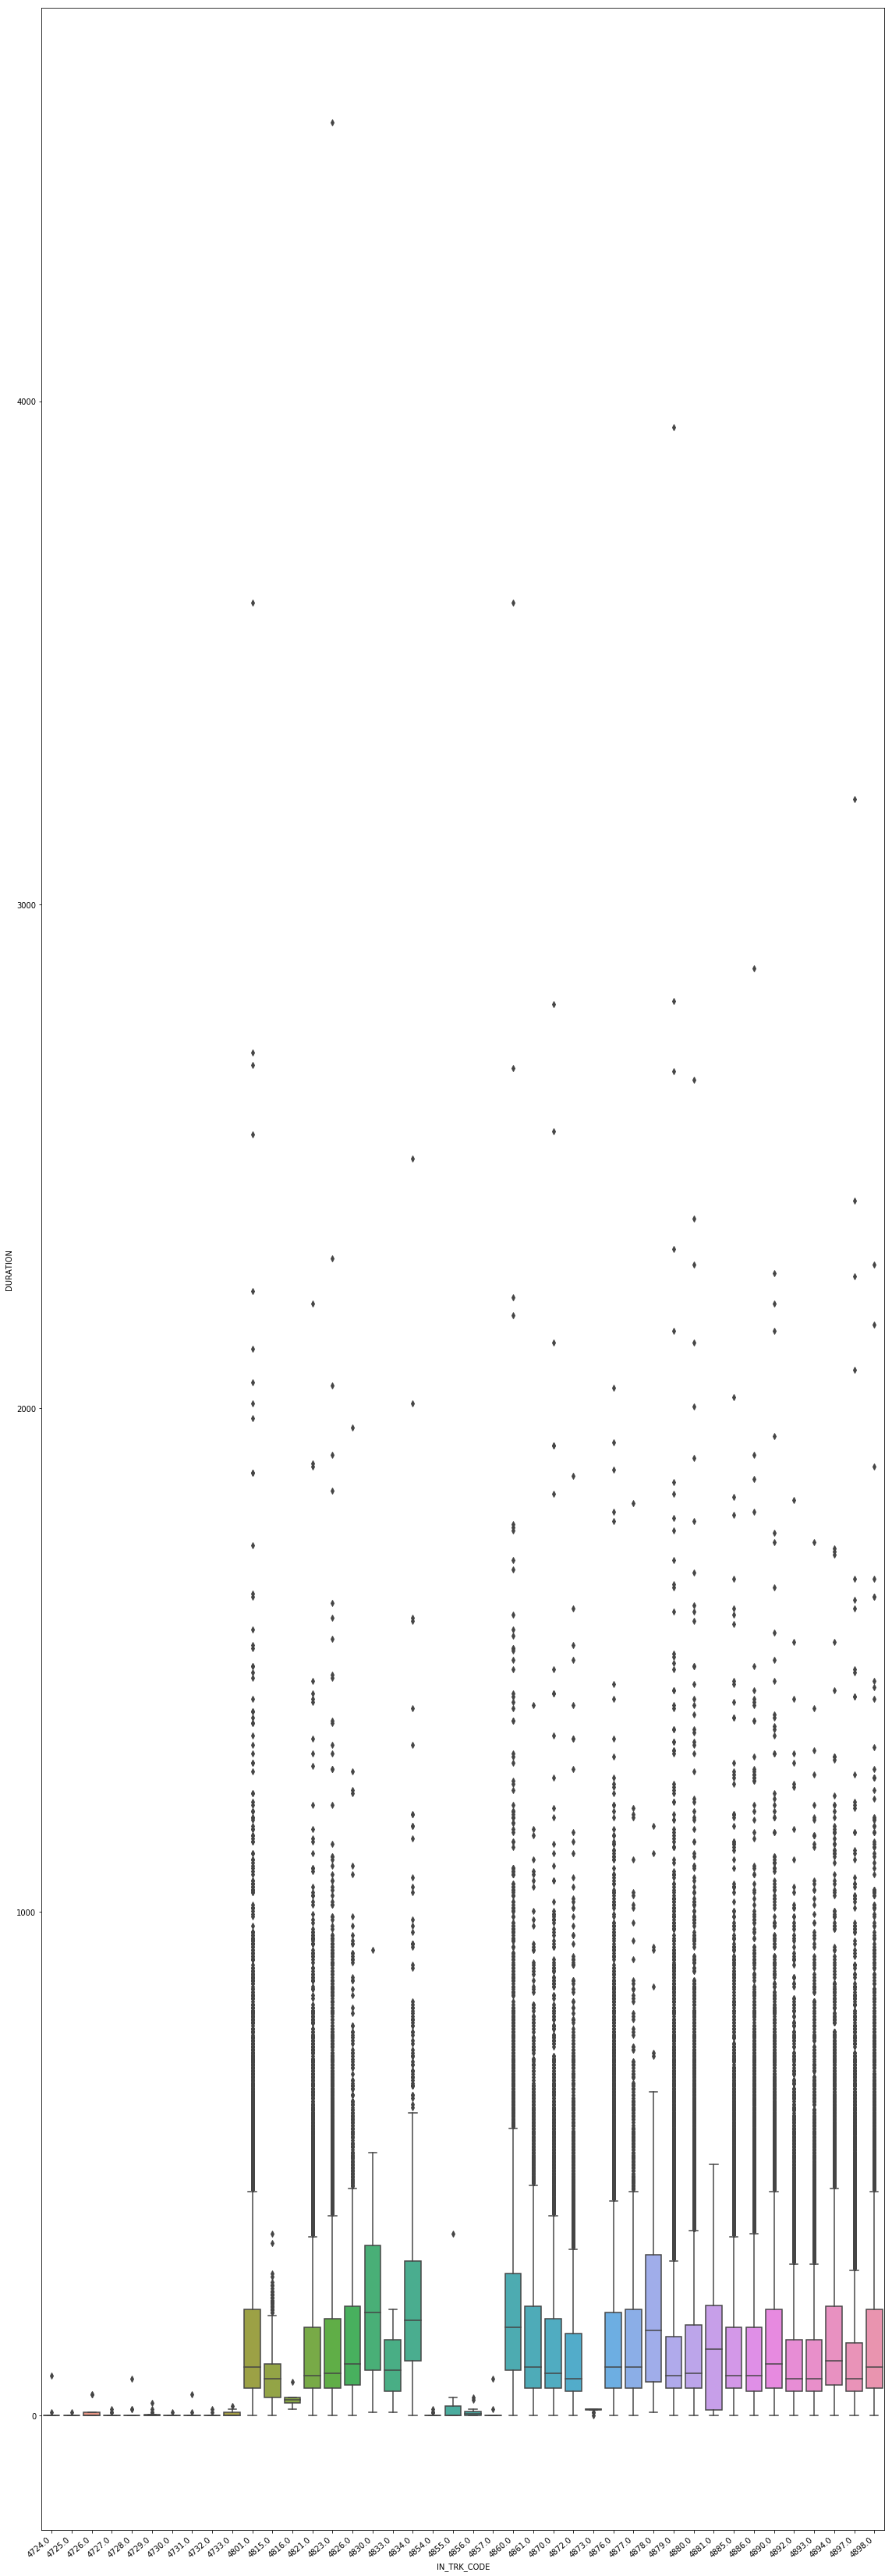

In [153]:
plt.pyplot.figure(figsize=(16,46))
ax = sns.boxplot(x="IN_TRK_CODE", y="DURATION", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.pyplot.tight_layout()
plt.pyplot.show()

# 5. 连续长通话

同一号码，连续两次通话间隔一分钟，每次通话超过半小时，如何做到？重复记录？

In [184]:
df_0 = df[df["DURATION"] > 600]
print df_0.shape
for i in df_0["CALLING_NUM"].value_counts().nlargest(10).items():
    province = df_0[df_0["CALLING_NUM"] == i[0]]["PROVINCE_NAME"].unique()
    city = df_0[df_0["CALLING_NUM"] == i[0]]["CALLERLOC"].unique()
    print int(i[0]),i[1],province[0],city[0]

(3400, 27)
15841350123 4 辽宁 抚顺
2180341997 4 nan 上海
13395402688 4 山东 菏泽
17709315546 3 nan nan
15066220077 3 山东 青岛
15637800015 3 河南 开封
18792597718 3 陕西 西安
13840000037 3 辽宁 沈阳
15383432630 3 山西 太原
18537880823 3 河南 开封


# 详细信息

,CALLING_NUM,DIALED_NUM,DURATION,IN_TRK_CODE,ADDRESS,PROVINCE_NAME,CALLERLOC,CALL_DATE
48488,15841350123,4712,468,4892,辽宁-1,辽宁,抚顺,2018/1/11 7:37:00
97965,15841350123,4712,636,4893,辽宁-2,辽宁,抚顺,2018/1/11 9:44:00
120241,15841350123,4712,576,4893,辽宁-2,辽宁,抚顺,2018/1/11 9:15:00
301159,15841350123,4712,36,4892,辽宁-1,辽宁,抚顺,2018/1/11 10:41:00
312281,15841350123,4712,48,4893,辽宁-2,辽宁,抚顺,2018/1/11 10:40:00
322669,15841350123,4712,6,4892,辽宁-1,辽宁,抚顺,2018/1/11 10:39:00
324328,15841350123,4712,756,4893,辽宁-2,辽宁,抚顺,2018/1/11 10:54:00
326039,15841350123,4712,1362,4893,辽宁-2,辽宁,抚顺,2018/1/11 10:39:00
508568,15841350123,4712,138,4892,辽宁-1,辽宁,抚顺,2018/1/11 10:16:00
1040526,15841350123,4712,846,4893,辽宁-2,辽宁,抚顺,2018/1/11 15:37:00


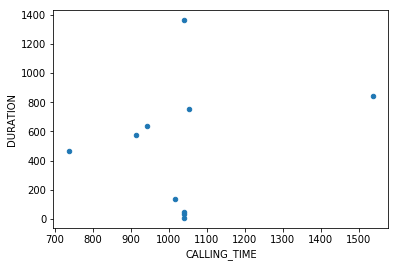

In [174]:
df_01 = df[df['CALLING_NUM'] == 15841350123]
df_01.plot(kind='scatter', x='CALLING_TIME', y='DURATION');
df_01.head(10)
df_01.loc[::,["CALLING_NUM","DIALED_NUM","DURATION","IN_TRK_CODE","ADDRESS","PROVINCE_NAME","CALLERLOC","CALL_DATE"]]

# 7. 半夜频繁拨打电话，时长较短

凌晨1:00到5:00频繁拨打电话，通话时长为0，或者较短

(6201, 27)
4445
3517893773     317
2472853935      49
2180341997      30
15659523827     21
17172243526     21
13642180581     10
15396197326     10
15543540352      9
13893154903      9
18919208955      9
Name: CALLING_NUM, dtype: int64


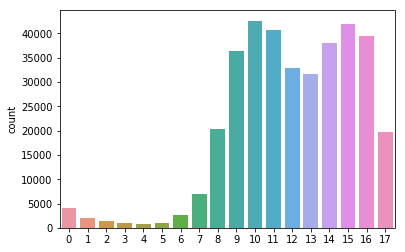

In [186]:
sns.countplot(df["HOURS"].values)

df_night = df[(df['HOURS'] > 0) & (df['HOURS'] < 6)]
print df_night.shape
print(len(df_night["CALLING_NUM"].unique()))
print df_night["CALLING_NUM"].value_counts().nlargest(10)

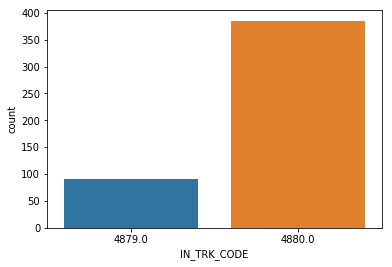

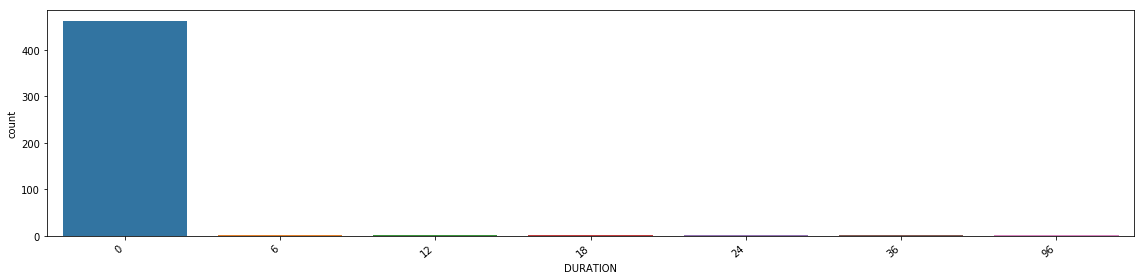

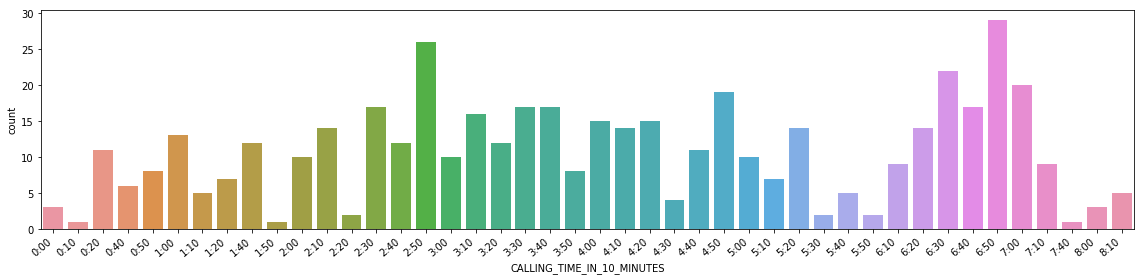

In [187]:
df_1 = df[df['CALLING_NUM'] == 3517893773]


sns.countplot(x="IN_TRK_CODE", data=df_1)

plt.pyplot.figure(figsize=(16,4))
ax = sns.countplot(x="DURATION", data=df_1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.pyplot.tight_layout()
plt.pyplot.show()

df1=df_1.sort_values(['CALLING_TIME'])
df1['CALLING_TIME_IN_10_MINUTES'] = df1['CALLING_TIME'].apply(lambda x:str(abs(x)/100) + ":" + str(abs(x)%100/10) + "0" )
plt.pyplot.figure(figsize=(16,4))
ax = sns.countplot(x="CALLING_TIME_IN_10_MINUTES", data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.pyplot.tight_layout()
plt.pyplot.show()

# 8. 白天频繁拨打电话，时长适中

早8点到晚8点频繁拨打电话，通话时长为0，或者适中

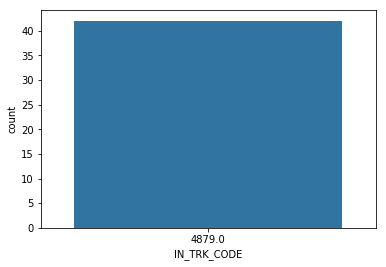

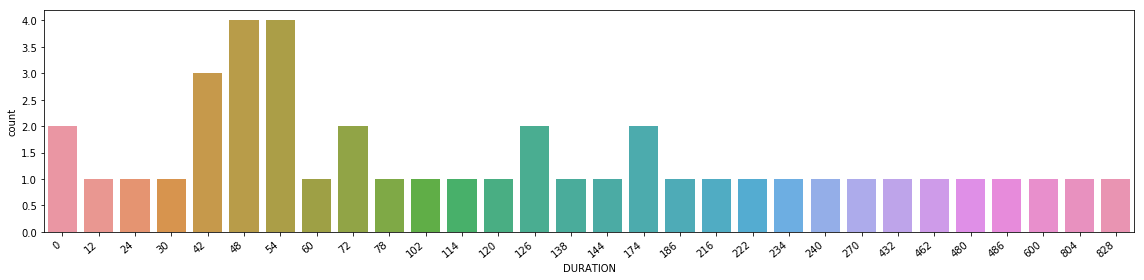

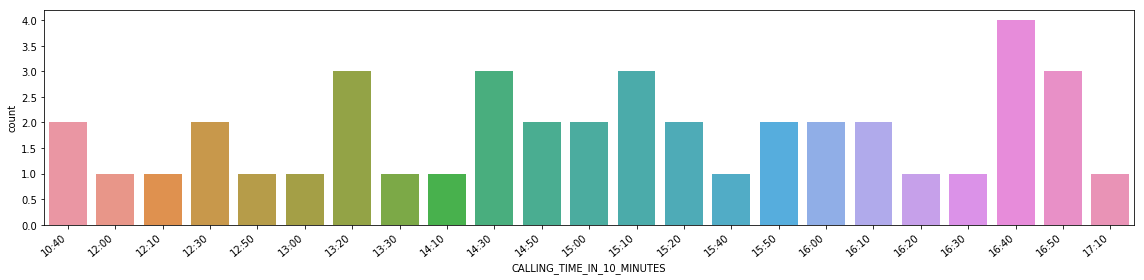

In [188]:
#移动可疑号码 1
df_1 = df[df['CALLING_NUM'] == 15222235526]

sns.countplot(x="IN_TRK_CODE", data=df_1)
#sns.countplot(x="ADDRESS", data=df_1)

plt.pyplot.figure(figsize=(16,4))
ax = sns.countplot(x="DURATION", data=df_1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.pyplot.tight_layout()
plt.pyplot.show()

df1=df_1.sort_values(['CALLING_TIME'])
df1['CALLING_TIME_IN_10_MINUTES'] = df1['CALLING_TIME'].apply(lambda x:str(abs(x)/100) + ":" + str(abs(x)%100/10) + "0" )
plt.pyplot.figure(figsize=(16,4))
ax = sns.countplot(x="CALLING_TIME_IN_10_MINUTES", data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.pyplot.tight_layout()
plt.pyplot.show()

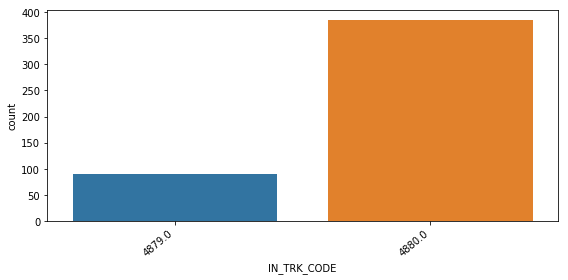

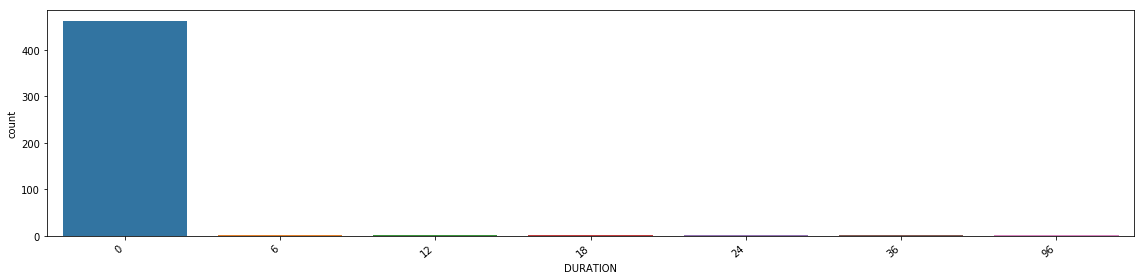

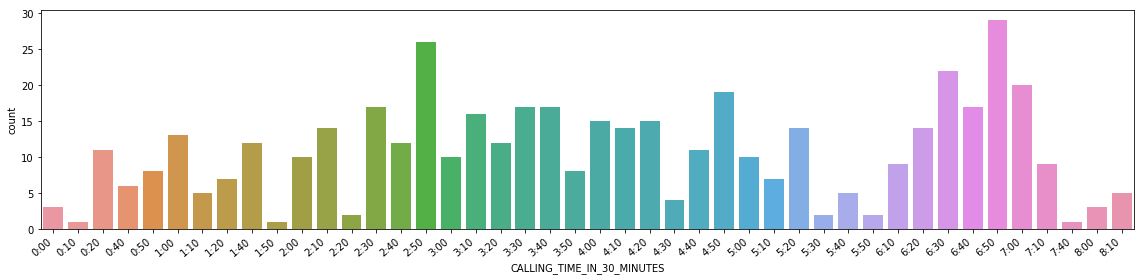

In [189]:
#其他可疑号码 1
df_1 = df[df['CALLING_NUM'] == 3517893773]

plt.pyplot.figure(figsize=(8,4))
ax = sns.countplot(x="IN_TRK_CODE", data=df_1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.pyplot.tight_layout()
plt.pyplot.show()

plt.pyplot.figure(figsize=(16,4))
ax = sns.countplot(x="DURATION", data=df_1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.pyplot.tight_layout()
plt.pyplot.show()

df1=df_1.sort_values(['CALLING_TIME'])
df1['CALLING_TIME_IN_30_MINUTES'] = df1['CALLING_TIME'].apply(lambda x:str(abs(x)/100) + ":" + str(abs(x)%100/10) + "0" )
plt.pyplot.figure(figsize=(16,4))
ax = sns.countplot(x="CALLING_TIME_IN_30_MINUTES", data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.pyplot.tight_layout()
plt.pyplot.show()

# 9. 集中一段时间内频繁拨打电话，通话时间短

一天内某个时间段集中频繁拨打电话，且通话时间极短。比如半小时内通话80次，30+次通话0秒，40+次通话12秒

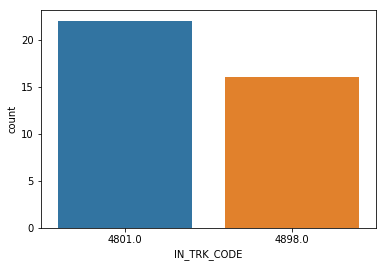

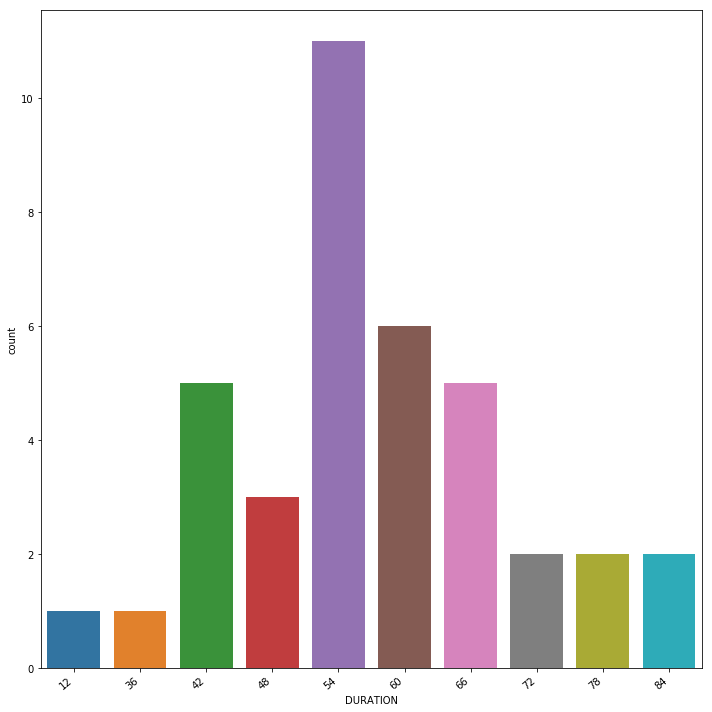

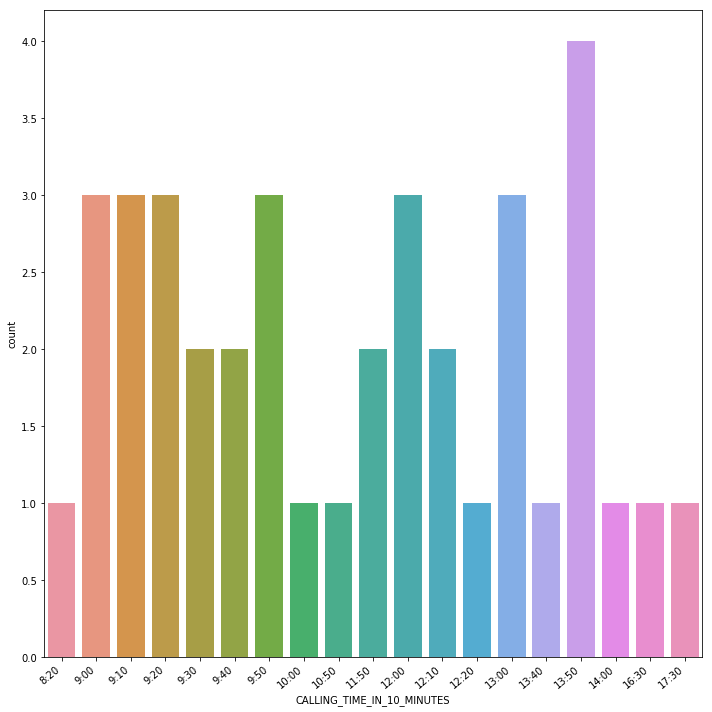

In [190]:
#移动可疑号码 2
df_1 = df[df['CALLING_NUM'] == 15236646257]

sns.countplot(x="IN_TRK_CODE", data=df_1)

plt.pyplot.figure(figsize=(10,10))
ax = sns.countplot(x="DURATION", data=df_1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.pyplot.tight_layout()
plt.pyplot.show()

df1=df_1.sort_values(['CALLING_TIME'])
df1['CALLING_TIME_IN_10_MINUTES'] = df1['CALLING_TIME'].apply(lambda x:str(abs(x)/100) + ":" + str(abs(x)%100/10) + "0" )
plt.pyplot.figure(figsize=(10,10))
ax = sns.countplot(x="CALLING_TIME_IN_10_MINUTES", data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.pyplot.tight_layout()
plt.pyplot.show()

# 10. 可疑电话组

一组可疑电话行为模式相似，且号码貌似有规律。比如一组联通号码（6个），每个号码都集中一段时间内频繁拨打电话（时间重叠或错开），通话时间短。

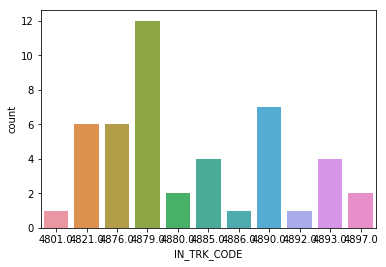

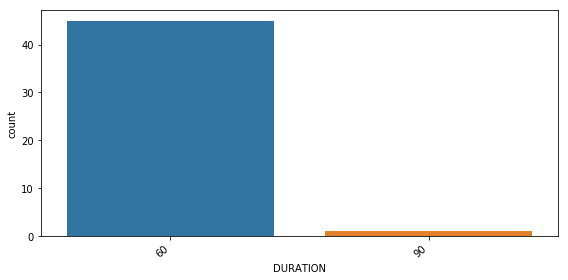

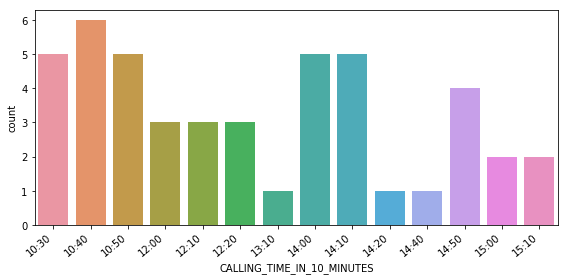

In [191]:
# 联通可疑号码 group
df_1 = df[df['CALLING_NUM'] == 15675120752]


sns.countplot(x="IN_TRK_CODE", data=df_1)

plt.pyplot.figure(figsize=(8,4))
ax = sns.countplot(x="DURATION", data=df_1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.pyplot.tight_layout()
plt.pyplot.show()

df1=df_1.sort_values(['CALLING_TIME'])
df1['CALLING_TIME_IN_10_MINUTES'] = df1['CALLING_TIME'].apply(lambda x:str(abs(x)/100) + ":" + str(abs(x)%100/10) + "0" )
plt.pyplot.figure(figsize=(8,4))
ax = sns.countplot(x="CALLING_TIME_IN_10_MINUTES", data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.pyplot.tight_layout()
plt.pyplot.show()

# 11. 同一号码频繁访问不同地域中继

电信某号码一天拨打电话多次访问地域中继2-3个

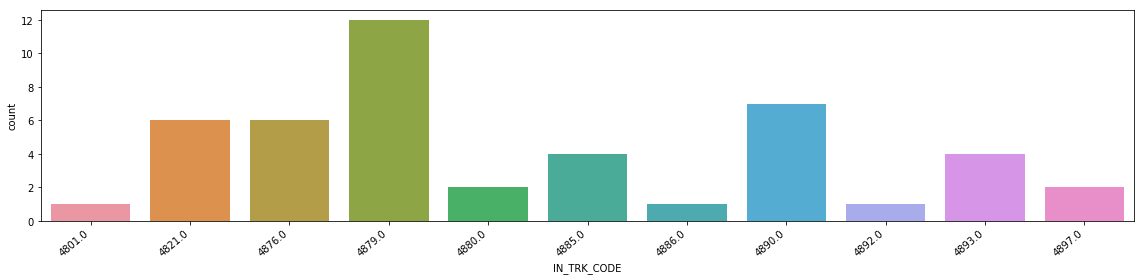

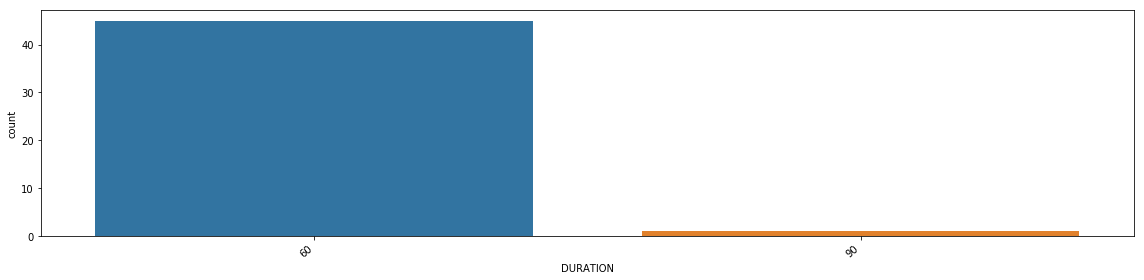

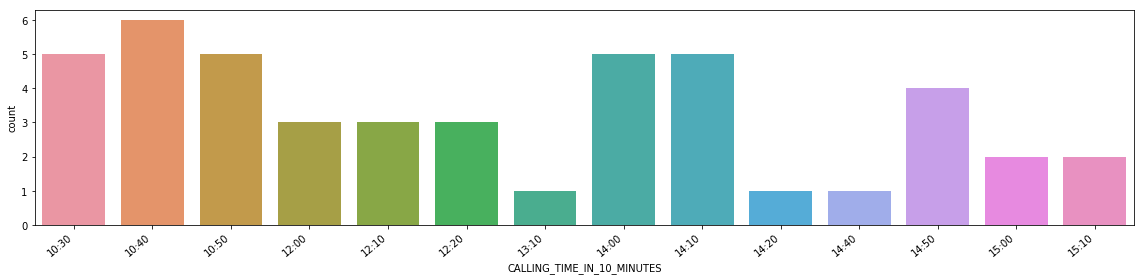

In [192]:
df_1 = df[df['CALLING_NUM'] == 15675120752]

plt.pyplot.figure(figsize=(16,4))
ax = sns.countplot(x="IN_TRK_CODE", data=df_1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.pyplot.tight_layout()
plt.pyplot.show()

plt.pyplot.figure(figsize=(16,4))
ax = sns.countplot(x="DURATION", data=df_1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.pyplot.tight_layout()
plt.pyplot.show()

df1=df_1.sort_values(['CALLING_TIME'])
df1['CALLING_TIME_IN_10_MINUTES'] = df1['CALLING_TIME'].apply(lambda x:str(abs(x)/100) + ":" + str(abs(x)%100/10) + "0" )
plt.pyplot.figure(figsize=(16,4))
ax = sns.countplot(x="CALLING_TIME_IN_10_MINUTES", data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.pyplot.tight_layout()
plt.pyplot.show()